In [1]:
import numpy as np
import pandas as pd
import graspologic as gs
import seaborn as sns
import matplotlib.pyplot as plt

from graspologic.embed import AdjacencySpectralEmbed as ASE
from graspologic.simulations import sbm
from graspologic.utils import remove_vertices
from graspologic.plot import pairplot, heatmap

### Make sure remove_vertices is doing what we think it is in the directed case

<AxesSubplot:>

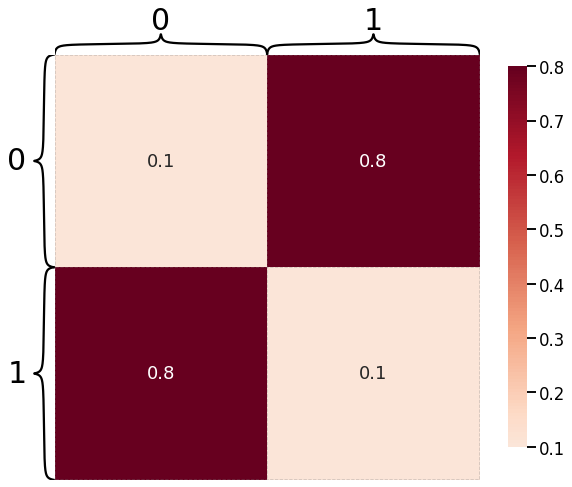

In [2]:
B = np.array([[.1, .8],
              [.8, .1]])

heatmap(B, annot=True, cmap="RdBu_r", center=0, inner_hier_labels=[0, 1])

In [3]:
A, labels = sbm([1000, 1000], B, return_labels=True, directed=True)
indices = [0, -1]
labels = list(labels)
oos_labels = [labels.pop(i) for i in indices]
A, a = remove_vertices(A, indices, return_removed=True)  # one oos vertex for each community


# indices = np.nonzero(np.r_[1, np.diff(labels)[:-1]])[0]


ase = ASE(n_components=2)
out_latent, in_latent = ase.fit_transform(A)
out_w, in_w = ase.predict(a)


print("actual: \n", out_latent, "\n")
print("pred: \n", out_w)
# # out dataframes
# out_oos_df = gs.plot.pairplot(pred_out, labels=oos_labels).data

# # in dataframes
# in_oos_df = gs.plot.pairplot(pred_in, labels=oos_labels).data

actual: 
 [[ 0.6703407   0.57224303]
 [ 0.6650164   0.57283891]
 [ 0.65911595  0.60541298]
 ...
 [ 0.64573274 -0.57068983]
 [ 0.67930037 -0.59817268]
 [ 0.66796776 -0.57903508]] 

pred: 
 [[ 0.68412083 -0.58272166]
 [ 0.66763329  0.5940621 ]]


In [4]:
in_latent

array([[ 0.6713655 , -0.60427119],
       [ 0.67272044, -0.60460947],
       [ 0.68908491, -0.60634363],
       ...,
       [ 0.65524179,  0.58544855],
       [ 0.66409956,  0.59217154],
       [ 0.66781566,  0.59311419]])

In [6]:
# Plot the data
df_labels = pd.DataFrame(labels, columns=["Type"])
oos_labels = pd.DataFrame(oos_labels, columns=["Type"])

in_latent_df = pd.concat([df_labels, pd.DataFrame(in_latent)], axis=1)
in_oos_df = pd.concat([oos_labels, pd.DataFrame(pred_in)], axis=1)

g = sns.pairplot(in_latent_df, hue="Type")
print(g.data)

# Change the PairGrid dataset and add a new layer
g.data = in_oos_df
print(g.data)
g.hue_vals = in_oos_df["Type"]
g.map_offdiag(plt.scatter, s=500, marker="*", edgecolor="black")

# # Plot the data
# g = sns.pairplot(out_latent, labels=labels)

# # Change the PairGrid dataset and add a new layer
# g.data = out_oos_df
# g.hue_vals = out_oos_df["Type"]
# g.map_offdiag(plt.scatter, s=500, marker="*", edgecolor="black")

NameError: name 'pred_in' is not defined